## Why is ATAC paired data performing so poorly?

In [133]:
import pickle

In [134]:
from pprint import pprint

In [135]:
from collections import Counter

In [150]:
graphs = pickle.load(open('input/graphs.pickle','rb'))
graphs = {k:g for g,k in graphs}

In [151]:
len(graphs)

8

In [153]:
atac_graphs = {k:g for k,g in graphs.items() if 'atac_region' in k}

In [154]:
atac_graphs

{('tad',
  'overlaps',
  'atac_region'): <networkx.classes.digraph.DiGraph at 0x7f9b018aa0d0>,
 ('atac_region',
  'overlaps',
  'gene'): <networkx.classes.digraph.DiGraph at 0x7f9b015e40a0>,
 ('atac_region',
  'neighbors',
  'gene'): <networkx.classes.digraph.DiGraph at 0x7f9b01235f70>}

In [140]:
in_edges = {}
for relation, graph in atac_graphs.items():
    graph = graph.to_undirected()
    in_edges[relation] = Counter()
    for node in list(graph.nodes()):
        # t=node type, k=node key
        t, k = node
        if t == 'atac_region':
            ie = graph.edges(node)
            if ie:
                n = len(list(ie))
                in_edges[relation][n]+=1
            else:
                in_edges[relation][0]+=1
    print(relation)
    pprint(sorted(in_edges[relation].items()))

('tad', 'overlaps', 'atac_region')
[(1, 116232)]
('atac_region', 'overlaps', 'gene')
[(0, 8615), (1, 14628), (2, 617), (3, 19), (4, 2), (5, 2), (14, 1)]
('atac_region', 'neighbors', 'gene')
[(0, 7445), (1, 23149), (2, 34110), (3, 28807), (4, 16691), (5, 5394), (6, 869)]


In [141]:
import networkx as nx

In [142]:
combined = nx.Graph()

in_edges = {}
for relation, graph in atac_graphs.items():
    graph = graph.to_undirected()
    combined = nx.compose(combined, graph)

In [143]:
combined.number_of_nodes()

136686

In [144]:
combined.number_of_edges()

393615

In [145]:
combined_in_edges = Counter()
for node in list(combined.nodes()):
    # t=node type, k=node key
    t, k = node
    if t == 'atac_region':
        ie = combined.edges(node)
        if ie:
            n = len(list(ie))
            combined_in_edges[n]+=1
        

In [146]:
c=0
for num_edges, count in combined_in_edges.most_common():
    c += count
    print(f'{num_edges:3d} {count:6d} {c}')

  3  34093 34093
  4  28832 62925
  2  23091 86016
  5  16700 102716
  1   7393 110109
  6   5442 115551
  7    886 116437
  8      8 116445
 15      1 116446


In [147]:
sum(combined_in_edges.values())

116446

## Why are there ATAC regions with zero neighboring genes? 

KDTree should always return k results for nearest neighbor search

In [148]:
relation = ('atac_region', 'neighbors', 'gene')
g = atac_graphs[relation]
c = 0
for node in g.nodes():
    t,k = node
    if t == 'atac_region':
        n = len(combined.edges(node))
        if n==0:
            print(node, n)
            c+=1
            if c==100:
                break

('atac_region', 'chr20-63056176-63057074') 0
('atac_region', 'chr20-63071550-63072399') 0
('atac_region', 'chr20-63073124-63073951') 0
('atac_region', 'chr20-63082120-63082947') 0
('atac_region', 'chr20-63135249-63135879') 0
('atac_region', 'chr20-63909387-63910281') 0
('atac_region', 'chr20-63911016-63911911') 0
('atac_region', 'chr20-63912780-63913648') 0
('atac_region', 'chr3-198167392-198168299') 0
('atac_region', 'chr3-198173451-198174154') 0
('atac_region', 'chr21-8212819-8213728') 0
('atac_region', 'chr21-8219517-8220424') 0
('atac_region', 'chr21-8234038-8234950') 0
('atac_region', 'chr5-181133379-181134219') 0
('atac_region', 'chr5-181138103-181138986') 0
('atac_region', 'chr5-181283845-181284586') 0
('atac_region', 'chr16-10596-11363') 0
('atac_region', 'chr11-135075573-135076400') 0
('atac_region', 'chr1-9776-10668') 0


## What's the distribution of coexpression links

In [155]:
proteins = graphs[('protein', 'coexpressed', 'protein')]

In [156]:
len(proteins)

18989

In [161]:
from itertools import islice

In [164]:
weights = []
for edge in proteins.edges(data=True):
    weights.append(edge[2]['weight'])


In [166]:
from matplotlib import pyplot as plt 

In [170]:
import numpy as np

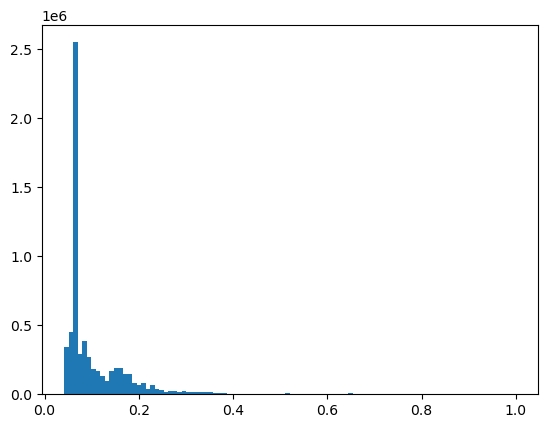

In [171]:
weights = np.array(weights)
plt.hist(weights, bins=100);

In [172]:
(weights > .25).sum()

391558

## Consider trimming protein coexpression to only the most highly weighted connections

In [174]:
%%javascript
IPython.notebook.kernel.execute(IPython.notebook.name)

<IPython.core.display.Javascript object>